## Small Image Classification Using Convolutional Neural Network (CNN)

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

In [138]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
import numpy as np

In [54]:
(X_train,y_train) , (X_test,y_test) =  datasets.cifar10.load_data()

In [55]:
X_train.shape

(50000, 32, 32, 3)

In [56]:
X_test.shape

(10000, 32, 32, 3)

In [57]:
classes = 'airplane automobile bird cat deer dog frog horse ship truck'.split()

In [58]:
y_train 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [59]:
y_train.shape

(50000, 1)

In [78]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [61]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [95]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.matshow(X[index])
    plt.xlabel(classes[y[index]])

<Figure size 1080x144 with 0 Axes>

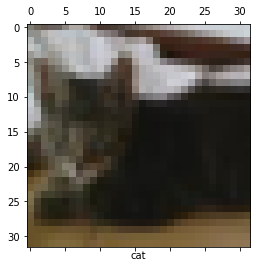

In [96]:
plot_sample(X_train,y_train,9)

In [64]:
X_train = X_train / 255
X_test = X_test / 255

In [65]:
X_train.shape

(50000, 32, 32, 3)

In [70]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy']
           )

ann.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_21 (Dense)            (None, 3000)              9219000   
                                                                 
 dense_22 (Dense)            (None, 1000)              3001000   
                                                                 
 dense_23 (Dense)            (None, 10)                10010     
                                                                 
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [71]:
ann.fit(X_train,y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 137s 87ms/step - loss: 1.8110 - accuracy: 0.3572
Epoch 2/5
1563/1563 [==============================] - 120s 77ms/step - loss: 1.6234 - accuracy: 0.4273
Epoch 3/5
1563/1563 [==============================] - 129s 83ms/step - loss: 1.5415 - accuracy: 0.4571
Epoch 4/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.4800 - accuracy: 0.4775
Epoch 5/5
1563/1563 [==============================] - 132s 84ms/step - loss: 1.4313 - accuracy: 0.4946


In [72]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(ele) for ele in y_pred]

print(classification_report(y_test,y_pred_classes))

              precision    recall  f1-score   support

           0       0.62      0.43      0.51      1000
           1       0.58      0.65      0.61      1000
           2       0.58      0.10      0.16      1000
           3       0.36      0.34      0.35      1000
           4       0.46      0.41      0.43      1000
           5       0.34      0.46      0.39      1000
           6       0.49      0.60      0.54      1000
           7       0.51      0.61      0.56      1000
           8       0.46      0.77      0.58      1000
           9       0.60      0.46      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



sigmoid
1: 0.45
2: 0.67
    
* softmax :- We get normalised output (Total sum = 1)
* 1: (0.45) / (0.45 + 0.67)  ||||||    2: (0.67) / (0.45 + 0.67)




#### CNN

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))
model.add(Conv2D(kernel_size=(2, 2), padding='same', strides=(2, 2), filters=64))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

In [149]:
cnn = models.Sequential([
    #cnn   - feature extraction
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics='accuracy')

cnn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 2304)              0         
                                                                 
 dense_34 (Dense)            (None, 64)              

In [150]:
cnn.fit(X_train,y_train,epochs=20)

Epoch 1/20
1563/1563 [==============================] - 57s 36ms/step - loss: 1.5021 - accuracy: 0.4592
Epoch 2/20
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1468 - accuracy: 0.5982
Epoch 3/20
1563/1563 [==============================] - 43s 28ms/step - loss: 1.0149 - accuracy: 0.6464
Epoch 4/20
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9360 - accuracy: 0.6749
Epoch 5/20
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8751 - accuracy: 0.6973
Epoch 6/20
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8242 - accuracy: 0.7165
Epoch 7/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7791 - accuracy: 0.7287
Epoch 8/20
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7373 - accuracy: 0.7452
Epoch 9/20
1563/1563 [==============================] - 35s 23ms/step - loss: 0.6986 - accuracy: 0.7597
Epoch 10/20
1563/1563 [==============================] - 35s 22m

In [151]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 1.1290 - accuracy: 0.6895


[1.1290204524993896, 0.6894999742507935]

In [143]:
y_pred = cnn.predict(X_test)
y_pred

array([[8.3534158e-04, 3.5488984e-04, 3.3242759e-04, ..., 2.2946199e-07,
        4.0738233e-03, 6.0699182e-04],
       [9.7053024e-05, 3.0746341e-03, 1.0568196e-07, ..., 1.0096488e-10,
        9.9681443e-01, 1.3811042e-05],
       [2.2352968e-01, 2.2749331e-02, 6.5316842e-03, ..., 2.8551870e-04,
        7.0915711e-01, 3.7591964e-02],
       ...,
       [9.3390372e-07, 2.9447824e-09, 7.5292461e-02, ..., 1.8766114e-02,
        1.0043163e-06, 4.1554912e-07],
       [3.8568094e-01, 1.2067255e-01, 4.4425252e-01, ..., 3.9542149e-04,
        9.8900367e-03, 4.9680995e-05],
       [7.8084426e-08, 7.9400007e-07, 5.8685931e-05, ..., 9.9980491e-01,
        1.2736494e-06, 4.8132662e-08]], dtype=float32)

In [144]:
y_classes = [np.argmax(ele) for ele in y_pred]

In [145]:
y_classes[:5]

[3, 8, 8, 0, 6]

In [146]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

predicted :-  horse


<Figure size 1080x144 with 0 Axes>

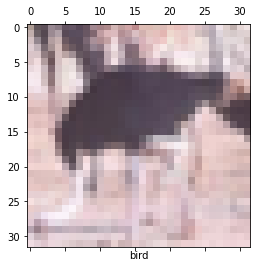

In [147]:
idx=2331
plot_sample(X_test,y_test,idx)
print('predicted :- ',classes[y_classes[idx]])

In [148]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.78      0.82      0.80      1000
           2       0.53      0.66      0.59      1000
           3       0.50      0.47      0.48      1000
           4       0.72      0.55      0.62      1000
           5       0.61      0.58      0.60      1000
           6       0.75      0.75      0.75      1000
           7       0.74      0.71      0.72      1000
           8       0.77      0.81      0.79      1000
           9       0.78      0.74      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

